In [2]:
import sys
import os
import importlib
# Add the parent directory to the Python path
sys.path.append(os.path.abspath('..'))

import src.data_collection
import src.trajectory_simulation
importlib.reload(src.data_collection)
from src.data_collection import *

importlib.reload(src.trajectory_simulation)
from src.trajectory_simulation import *



In [3]:
hr = get_team_home_runs("NYY", False)

Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data


c:\Users\lukat\Desktop\Catch-Zone\src\data_collection\statcast_data.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  team_at_bat = pd.concat(dataframes, ignore_index=True)


In [5]:
hr50 = hr[hr['game_date'] == '2024-04-06']
print(hr50.head(1).to_string())


      pitch_type   game_date  release_speed  release_pos_x  release_pos_z     player_name  batter pitcher    events    description spin_dir  zone                                                                            des game_type stand p_throws home_team away_team type  hit_location   bb_type balls strikes game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b     on_1b outs_when_up inning inning_topbot    hc_x   hc_y  umpire  sv_id       vx0         vy0      vz0        ax         ay         az  sz_top  sz_bot  hit_distance_sc  launch_speed  launch_angle  effective_speed  release_spin_rate  release_extension game_pk fielder_2 fielder_3 fielder_4 fielder_5 fielder_6 fielder_7 fielder_8 fielder_9  release_pos_y  estimated_ba_using_speedangle  estimated_woba_using_speedangle  woba_value  woba_denom  babip_value  iso_value  launch_speed_angle at_bat_number pitch_number pitch_name home_score away_score bat_score fld_score post_away_score post_home_score post_bat_score post_fld_score i

In [7]:
last_item = list(simulate_row(hr50).items())[-1]
print(last_item)


(3.47, [[36.07217607870796, 87.15276464799219, 0.023055293551628952], [3.9739372153436037, 19.16518932782965, -16.62209457847132], [-2.039708965406071, -3.387127255708441, -7.627068186544882]])


c:\Users\lukat\Desktop\Catch-Zone\src\trajectory_simulation\trajectory_simulator.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  omega_t = float(row[['release_spin_rate']].iloc[0]) # rpm
c:\Users\lukat\Desktop\Catch-Zone\src\trajectory_simulation\trajectory_simulator.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  v_t = float(row[['launch_speed']].iloc[0]) # mph
c:\Users\lukat\Desktop\Catch-Zone\src\trajectory_simulation\trajectory_simulator.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  theta = float(row[['launch_angle']].iloc[0]) # deg
c:\Users\lukat\Desktop\Catch-Zone\src\trajectory_simulation\trajectory_simulator.py:62: FutureWarning: Calling float on a single element Series

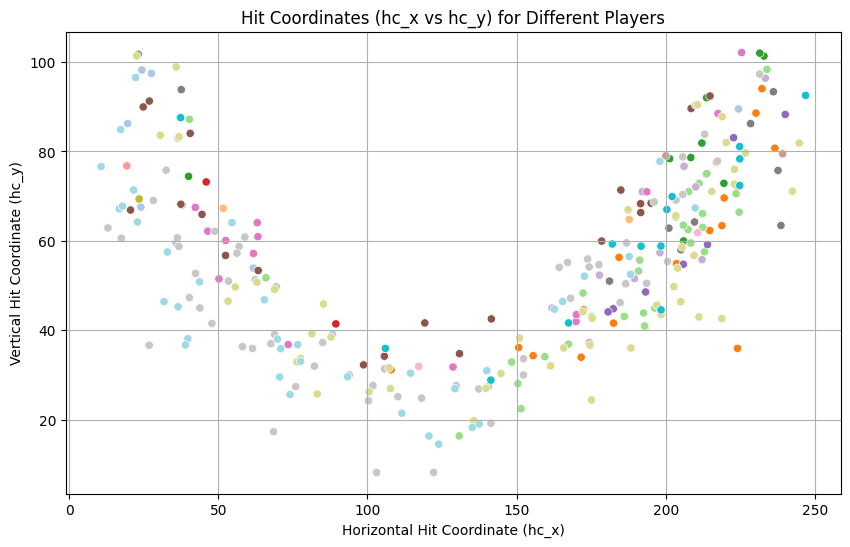

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a pandas DataFrame called df
# Example DataFrame loading
# df = pd.read_csv('your_file.csv')

# Extract relevant columns
df_hits = hr[['player_name', 'hc_x', 'hc_y']]

# Set up a scatter plot with different colors for each player
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hc_x', y='hc_y', hue='player_name', data=df_hits, palette='tab20', legend=None)

# Add labels and title
plt.title('Hit Coordinates (hc_x vs hc_y) for Different Players')
plt.xlabel('Horizontal Hit Coordinate (hc_x)')
plt.ylabel('Vertical Hit Coordinate (hc_y)')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming simulate_row is defined earlier
# Create a list of last values
last_values = []

for idx, row in hr.iterrows():
    last_item = list(simulate_row(row).items())[-1]  # Get the last item
    last_values.append(last_item[1])  # Store only the value, not the key

# Add the last values to the DataFrame as a new column
hr['last_value'] = last_values

# Make sure your DataFrame has a 'player_name' column or a similar identifier for each player
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot using seaborn with each player as a different hue
sns.lineplot(data=hr, x='game_date', y='last_value', hue='player_name', marker='o')

# Add labels and title
plt.xlabel('Game Date')
plt.ylabel('Simulated Last Value')
plt.title('Last Simulated Values for Each Player')

# Show the plot
plt.legend(title='Player')
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>